<a href="https://colab.research.google.com/github/jpastor1649/Teoinfo-2025I/blob/main/LABS/LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio: - “ANÁLISIS Y TRANSMISIÓN DE SEÑALES”

##Librerias
Primero se importan las librerías necesarias para este laboratrorio, numpy para las operaciones matemáticas como seno y coseno, entre otras utilidades y matplotlib para poder observar gráficamente nuestros resultados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


##Punto 1

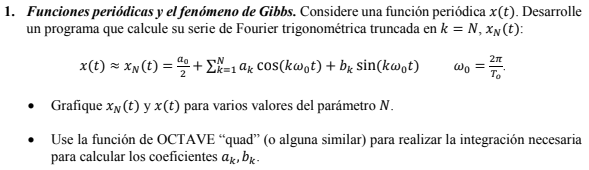

En este punto, implementamos un programa que calcula la serie de Fourier trigonométrica truncada para una función periódica $x(t)$. Esta serie nos permite aproximar funciones periódicas mediante una combinación de senos y cosenos.

La fórmula utilizada es:
$$x_N(t) = \frac{a_0}{2} + \sum_{k=1}^{N} a_k \cos(k\omega _0 t) + \sin(k\omega _0 t)  \text{ con } \omega _0 = \frac{2\pi}{T_0}$$

donde los coeficientes $a_k$ y $b_k$ se obtienen mediante integración sobre un perioso de la función. Para esto se usa la función `quad` que en python se encuentra en la librería `scipy.integrate`.

Esta función se encarga de calcular la integral definida de una función matemática.



In [ ]:
from scipy.integrate import quad

Para este ejercicio definimos una función periódica sencilla en el intervalo $[-\frac{T}{2}, \frac{T}{2}]$, en este caso, elegimos una onda cuadrada definida como:

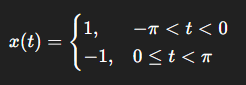


En el intervalo $[-\pi, \pi]$, lo que significa que $T=2\pi$

In [ ]:
# Parámetros
T0 = 2 * np.pi    # Periodo de la onda
omega0 = 2 * np.pi / T0  #Frecuencua angular

# Función periódica: onda cuadrada en [-π, π]
def x_t(t):
    t = (t + np.pi) % (2 * np.pi) - np.pi  # hace t periódico
    return np.where(t < 0, 1, -1)

Ahora procedemos a encontrar los coeficientes de la serie de Fourier para poder aproximar la función elegida con ayuda de la función `quad`. Ya hallados estos coeficientes obtenemos la función aproximada.

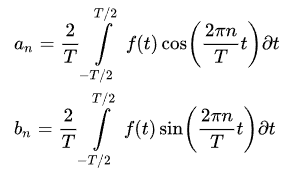

In [ ]:
# Coeficientes de Fourier (a0, ak, bk)
def a_k(k):
    # Se reemplaza la integral de la definición de la Serie de Fourier
    result, _ = quad(lambda t: x_t(t) * np.cos(k * omega0 * t), -np.pi, np.pi)
    return (1 / np.pi) * result # Se multiplica por 2/T_0 = 1/π

def b_k(k):
    # Se reemplaza la integral de la definición de la Serie de Fourier
    result, _ = quad(lambda t: x_t(t) * np.sin(k * omega0 * t), -np.pi, np.pi)
    return (1 / np.pi) * result # Se multiplica por 2/T_0 = 1/π

def xN_t(t, N): # Se obtiene la representación de x(t) con la serie de Fourier
    # a_0 se define como la componente promedio (nivel de base) de la señal
    a0, sum_terms = a_k(0) / 2, 0
    for k in range(1, N + 1):
        ak = a_k(k)
        bk = b_k(k)
        sum_terms += ak * np.cos(k * omega0 * t) + bk * np.sin(k * omega0 * t)
    return a0 + sum_terms

Ya obtenida la función aproximada, evaluamos ambas funciones, tanto la original como la aproximada para compararlas gráficamente en el dominio definido. En este caso se prueba con distintos números de $N$ (1, 5, 15 y 25)

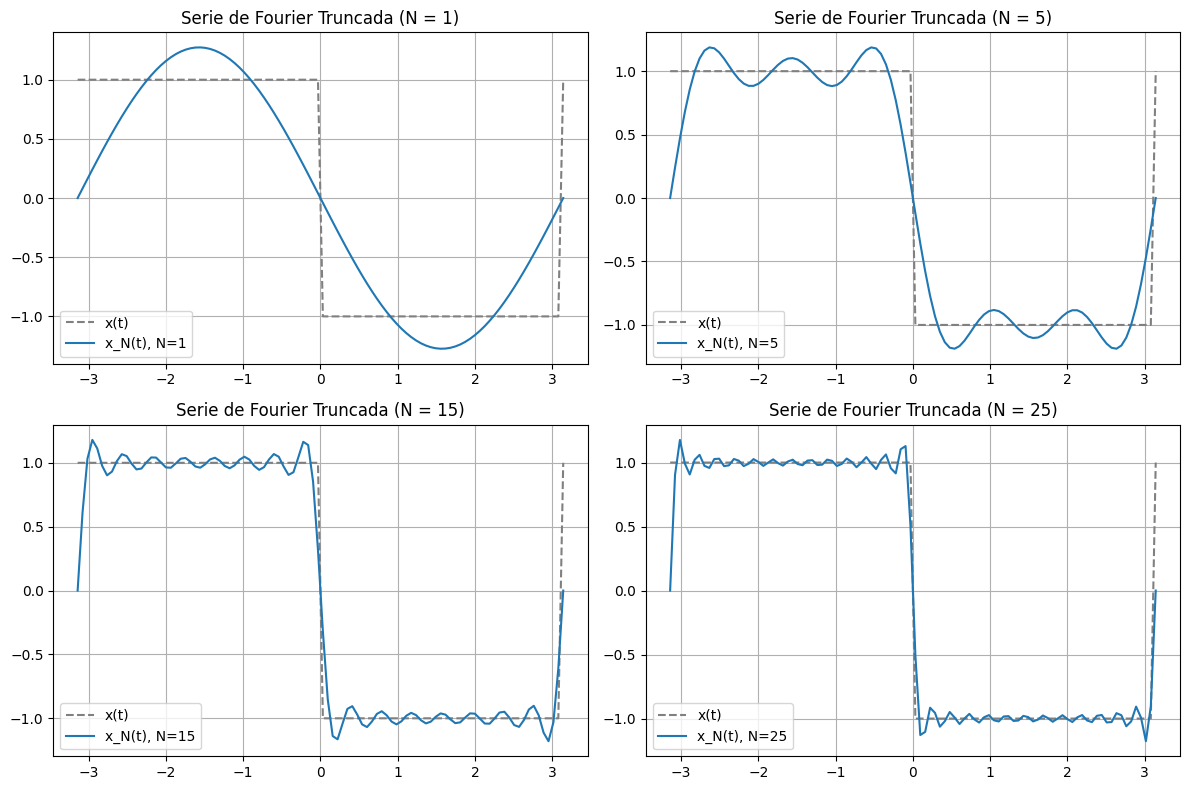

In [ ]:
# Evaluar en un dominio
t_vals = np.linspace(-np.pi, np.pi, 100) # [-π, π] con 100 muestras
x_original = x_t(t_vals)

# Graficar la serie truncada para varios N
plt.figure(figsize=(12, 8))

for i, N in enumerate([1, 5, 15, 25]):
    xN_vals = np.array([xN_t(t, N) for t in t_vals])
    plt.subplot(2, 2, i+1)
    # Función periódica original
    plt.plot(t_vals, x_original, label='x(t)', color='gray', linestyle='--')
    # Función obtenida con la Serie de Fourier
    plt.plot(t_vals, xN_vals, label=f'x_N(t), N={N}')
    plt.title(f'Serie de Fourier Truncada (N = {N})')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


Ya obtenidas estas gráficas podemos observar gráficamente el **fenómeno de Gibbs**.

Este fenómeno describe una oscilación persistente cerca de los puntos de discontinuidad de una función cuando esta se aproxima mediante una serie de Fourier truncada. A medida que se incrementa el número de términos
$N$, la amplitud de la oscilación se estabiliza pero no desaparece, aunque se concentra más cerca del punto de discontinuidad.


##Punto 2

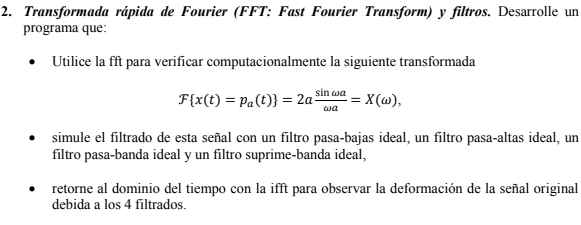


$F${$x(t)=P_a(t)$}$ = 2a \frac{sin(\omega a)}{\omega a} = X(\omega)$

- Se define un pulso rectangular centrado en
𝑡
=
0
t=0, con un semi-ancho $a=0.1$ segundos.


- El intervalo de muestreo dt es el inverso de fs.

- N representa el número total de muestras durante el segundo de duración.

- El vector de tiempo t se centra en cero usando $\frac{-T}{2}$ para que el pulso tenga simetría respecto al origen.
- creamos la señal rectangular de altura 1 que vale 1 cuando el tiempo esta entre $-a$ y $a$, y $0$ en el resto



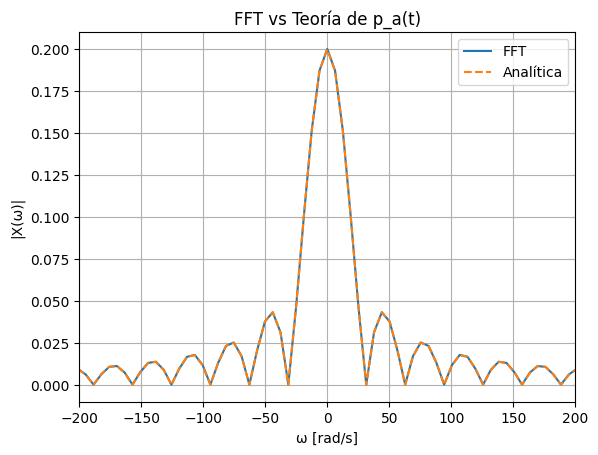

In [ ]:
# Parámetros de la señal
width = 0.1              # semi-ancho del pulso (s)
frecm = 5000            # frecuencia de muestreo (Hz)
T = 1               # duración total (s)
dt = 1 / frecm           # intervalo de muestreo
N = int(T * frecm)       # número de muestras
t = np.arange(N) * dt - T/2  # vector de tiempo de las muestras, centrado en t=0

# Señal p_a(t): pulso rectangular |t| <= a
x = np.where(np.abs(t) <= width, 1.0, 0.0)

# FFT y eje de pulsaciones
X = np.fft.fft(x) * dt      #calcula la transformada discreta (DFT) de x y se multiplica por dt para aproximar la integral continua.
# print("X",X)
f = np.fft.fftfreq(N, d=dt) #genera los valores de frecuencia Fk correspondientes a cada coeficiente Xk
# print("f",f)
omega = 2 * np.pi * f       #Se convierte a una pulsacion
# print("omega",omega)
X_shift = np.fft.fftshift(X)
# print("X_shift",X_shift)
omega_shift = np.fft.fftshift(omega)      #reordena el vector para que la frecuencia cero quede en el centro del array.


# Transformada analítica
X_analytic = 2 * width * np.sinc(omega_shift * width / np.pi)

# 1) Comparación FFT vs analítica
plt.figure()
plt.plot(omega_shift, np.abs(X_shift), label='FFT')
plt.plot(omega_shift, np.abs(X_analytic), '--', label='Analítica')
plt.xlim(-200, 200)
plt.xlabel('ω [rad/s]')
plt.ylabel('|X(ω)|')
plt.title('FFT vs Teoría de p_a(t)')
plt.legend()
plt.grid(True)


# 1. Filtro Pasa-Bajas (Low-Pass Filter): Deja pasar las frecuencias bajas y elimina las altas.

  - Suaviza la señal.

  - Elimina ruido o detalles rápidos (variaciones bruscas).


# 2.  **Filtro Pasa-Altas (High-Pass Filter)**: Deja pasar las frecuencias altas y elimina las bajas.

  - Resalta los cambios bruscos (bordes, transiciones).

  - Elimina componentes lentas (constantes o de baja variación).

  - Produce una señal más oscilatoria

# 3. Filtro Pasa-Banda (Band-Pass Filter): Deja pasar solo las frecuencias dentro de un rango definido (entre ω₁ y ω₂) y elimina las demás.


  - Solo quedan ciertas oscilaciones características de esa banda.

  - Útil para extraer componentes específicas de una señal compleja.

# 4. Filtro Supresor de Banda (Band-Stop o Notch Filter) Elimina un rango específico de frecuencias y deja pasar las bajas y las altas (fuera de ese rango).


  - Suprime ciertas oscilaciones que se quieren eliminar (por ejemplo, una frecuencia de interferencia).

  - Puede dejar la señal con partes suaves y otras muy oscilantes.

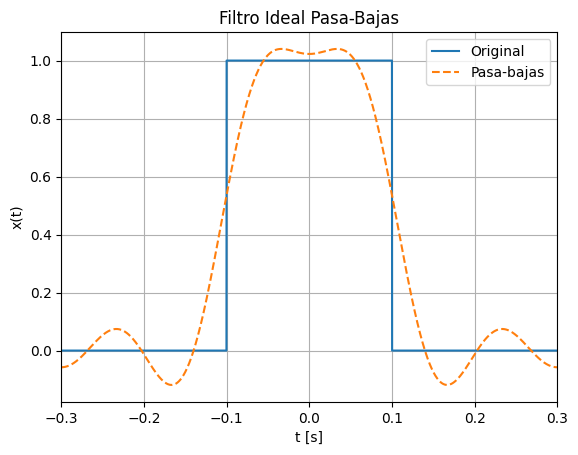

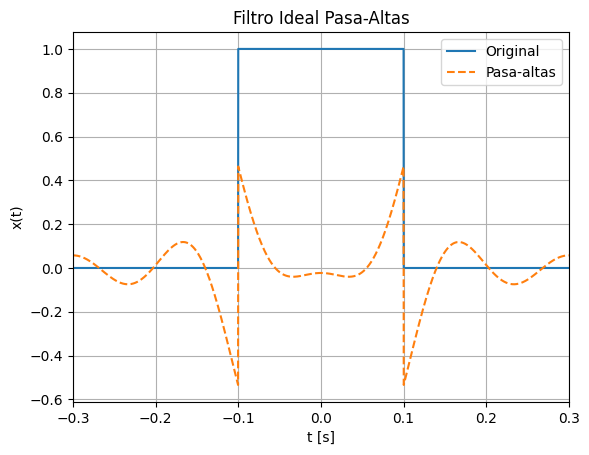

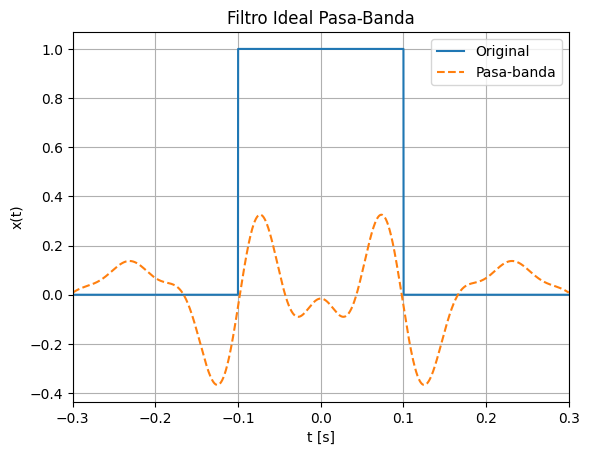

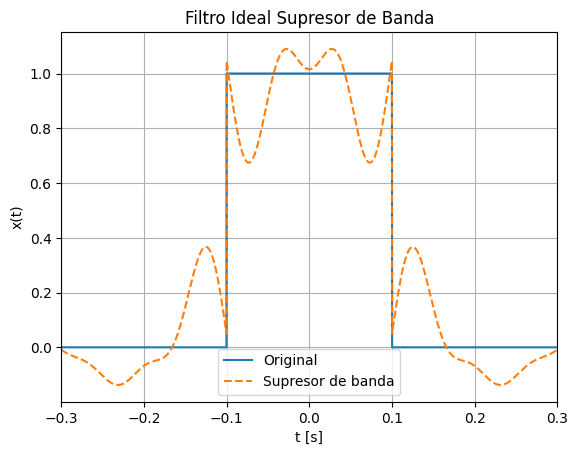

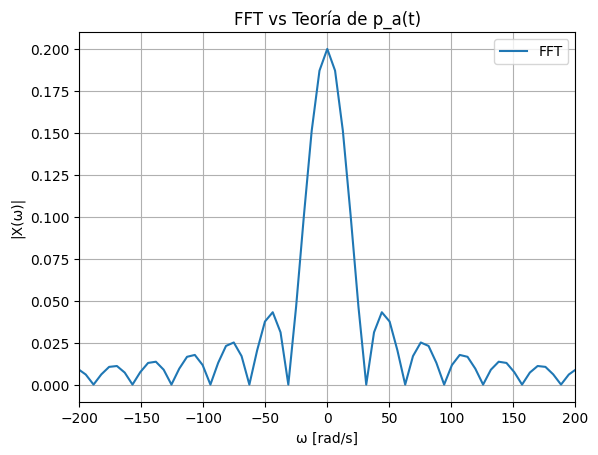

In [ ]:

# Definición de filtros ideales
ω_lp = 50                      # pasa-bajas hasta ±ω_lp
ω_hp = 50                      # pasa-altas fuera de ±ω_hp
ω_bp = (20, 100)               # pasa-banda entre ω_bp[0] y ω_bp[1]

# máscaras en frecuencia
#Cada mask_* es un array de True/False del mismo tamaño que omega_shift.
mask_lp = np.abs(omega_shift) <= ω_lp
mask_hp = np.abs(omega_shift) >= ω_hp
mask_bp = (np.abs(omega_shift) >= ω_bp[0]) & (np.abs(omega_shift) <= ω_bp[1])
mask_bs = ~mask_bp

# Aplicar filtros y volver al dominio del tiempo
#Al multiplicar la FFT por la máscara, se anulan (ponen a cero) las componentes no deseadas.
def apply_filter(mask):
    # print(f"X_shift:{X_shift}")
    # print(f"mask: {mask}")
    X_filt_shift = X_shift * mask
    # print(f"filt_shift:{X_filt_shift}")
    X_filt = np.fft.ifftshift(X_filt_shift)
    # print(f"filt:{X_filt}",X_filt[int(len(X_filt)/2)])
    x_filt = np.real(np.fft.ifft(X_filt)) / dt
    # print(f"x_filt:{x_filt}",x_filt[int(len(x_filt)/2)])

    # print("=="*50)
    return x_filt

#nos devuelve la señal filtrada en tiempo;
#tomamos la parte real (la parte imaginaria es numéricamente cero) y dividimos por dt para compensar el escalado previo

x_lp = apply_filter(mask_lp)
x_hp = apply_filter(mask_hp)
x_bp = apply_filter(mask_bp)
x_bs = apply_filter(mask_bs)

# 2) Señal filtrada pasa-bajas
#Pasa‑bajas: el pulso se “suaviza” y aparecen lóbulos laterales atenuados
# print(f"x_lp:{x_lp}")

plt.figure()
plt.plot(t,x, label='Original')
plt.plot(t, x_lp, '--', label='Pasa-bajas')
plt.xlim(-0.3, 0.3)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.title('Filtro Ideal Pasa-Bajas')
plt.legend()
plt.grid(True)

# 3) Señal filtrada pasa-altas
#Pasa‑altas: la parte baja frecuencia desaparece y queda un tren de oscilacione
plt.figure()
plt.plot(t, x, label='Original')
plt.plot(t, x_hp, '--', label='Pasa-altas')
plt.xlim(-0.3, 0.3)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.title('Filtro Ideal Pasa-Altas')
plt.legend()
plt.grid(True)

# 4) Señal filtrada pasa-banda
#Pasa‑banda: solo persisten las oscilaciones en la franja seleccionada
plt.figure()
plt.plot(t, x, label='Original')
plt.plot(t, x_bp, '--', label='Pasa-banda')
plt.xlim(-0.3, 0.3)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.title('Filtro Ideal Pasa-Banda')
plt.legend()
plt.grid(True)

# 5) Señal filtrada supresor de banda (stop-band)
#Supresor de banda: se elimina esa franja y quedan componentes de muy baja y muy alta frecuencia.

plt.figure()
plt.plot(t, x, label='Original')
plt.plot(t, x_bs, '--', label='Supresor de banda')
plt.xlim(-0.3, 0.3)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.title('Filtro Ideal Supresor de Banda')
plt.legend()
plt.grid(True)


plt.figure()
plt.plot(omega_shift, np.abs(X_shift), label='FFT')
plt.xlim(4, 4)
plt.xlabel('ω [rad/s]')
plt.ylabel('|X(ω)|')
plt.title('FFT vs Teoría de p_a(t)')
plt.legend()
plt.grid(True)
plt.show()

